In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from IPython.display import display
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
df = pd.read_csv('./train.csv')

In [4]:
df.shape

(2051, 81)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         20

In [4]:
df.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [5]:
display(df.head())

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [6]:
#df['Street'].value_counts()
df['Year Built'].value_counts()
#df['Land Contour'].value_counts()
#df['Functional'].value_counts()
df['Neighborhood'].value_counts()
#df['Land Slope'].value_counts()
df['MS SubClass'].value_counts()
df['MS Zoning'].value_counts()
#df['Alley'].value_counts() # Mostly null
df['Lot Shape'].value_counts()
#df['Utilities'].value_counts()
df['Lot Config'].value_counts()
df['Condition 1'].value_counts()
#df['Condition 2'].value_counts()a
df['Bldg Type'].value_counts()
df['House Style'].value_counts()
df['Year Built'].value_counts() # Non-ordinal
df['Year Remod/Add'].value_counts() # Non-ordinal
#df['Roof Style'].value_counts()
#df['Roof Matl'].value_counts()
df['Exterior 1st'].value_counts()
#df['Exterior 2nd'].value_counts()
df['Mas Vnr Type'].value_counts() # Possible interaction with Vnr Area
df['Exter Qual'].value_counts()
df['Exter Cond'].value_counts() # Possible interaction with Exter Qual
df['Foundation'].value_counts()
df['Bsmt Qual'].value_counts()
#df['Bsmt Cond'].value_counts() # Maybe interacts with Qual?
df['Bsmt Exposure'].value_counts() # Possible interation with other bsmt stuff
df['BsmtFin Type 1'].value_counts()
#df['BsmtFin Type 2'].value_counts() # Not many with 2 basements
#df['Heating'].value_counts() # Too homogenous
df['Heating QC'].value_counts()
df['Central Air'].value_counts() # Maybe... Only one column...
#df['Electrical'].value_counts() # Too homogenous
df['Kitchen Qual'].value_counts() # Check interaction with other kitchen stuff
#df['Functional'].value_counts() # Too homogenous
#df['Fireplace Qu'].value_counts() # Mostly null
df['Garage Type'].value_counts()
#df['Garage Yr Blt'].value_counts() # Non ordinal, though newer is better I guess
df['Garage Finish'].value_counts()
#df['Garage Qual'].value_counts() # Too homogenous
#df['Garage Cond'].value_counts() # Too homogenous
df['Paved Drive'].value_counts() # Pretty homogenous but also only adds two columns...
#df['Pool QC'].value_counts() # Mostly null values
#df['Fence'].value_counts() # Mostly null values
##df['Misc Feature'].value_counts() # Mostly null but always adds value to property
##df['Misc Val'].value_counts() # Interacts with above probably?
df['Mo Sold'].value_counts() # Non ordinal. Is it even relevant?
df['Yr Sold'].value_counts() # Non ordinal; prices do change through the years
df['Sale Type'].value_counts() # No idea what it means but it's worth checking out

WD       1781
New       160
COD        63
ConLD      17
CWD        10
ConLI       7
ConLw       5
Oth         4
Con         4
Name: Sale Type, dtype: int64

In [5]:
df['MS SubClass'].value_counts()

20     770
60     394
50     198
120    132
30     101
70      90
160     88
80      86
90      75
190     46
85      28
75      16
45      11
180     11
40       4
150      1
Name: MS SubClass, dtype: int64

In [7]:
# Drop columns composed largely of null values. Still on the fence about
# the Misc Features category
df = df.drop(columns=['Alley', 'Pool QC', 'Fence', 'Misc Feature', 'Fireplace Qu'])
# Drop non-numeric columns that are not good dummy candidates
df = df.drop(columns=['Street', 'Land Contour', 'Functional', 'Land Slope',
                     'Utilities', 'Condition 2', 'Roof Style', 'Roof Matl',
                     'Exterior 2nd', 'Bsmt Cond', 'BsmtFin Type 2', 'Heating',
                     'Electrical', 'Functional', 'Garage Yr Blt', 'Garage Qual',
                     'Garage Cond'])

In [8]:
df['Neighborhood'].value_counts()

NAmes      310
CollgCr    180
OldTown    163
Edwards    143
Somerst    130
NridgHt    122
Gilbert    116
Sawyer     111
SawyerW     87
NWAmes      87
Mitchel     82
BrkSide     76
Crawfor     71
IDOTRR      69
NoRidge     48
Timber      48
StoneBr     38
SWISU       32
ClearCr     27
MeadowV     24
Blmngtn     22
BrDale      19
Veenker     17
NPkVill     17
Blueste      6
Greens       3
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64

In [9]:
df2 = pd.get_dummies(df, columns=['Year Built', 'Neighborhood', 'MS SubClass',
               'MS Zoning', 'Lot Shape', 'Lot Config', 'Condition 1',
               'Bldg Type', 'House Style', 'Year Built', 'Year Remod/Add',
               'Exterior 1st', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond',
               'Foundation', 'Bsmt Qual', 'Bsmt Exposure', 'BsmtFin Type 1',
               'Heating QC', 'Central Air', 'Kitchen Qual', 'Garage Type',
               'Garage Finish', 'Paved Drive', 'Mo Sold', 'Yr Sold',
               'Sale Type'])

In [10]:
# Dummy candidates:
'Year Built'
'Neighborhood'
'MS SubClass'
'MS Zoning'
'Lot Shape'
'Lot Config'
'Condition 1'
'Bldg Type'
'House Style'
'Year Built'
'Year Remod/Add'
'Exterior 1st'
'Mas Vnr Type'
'Exter Qual'
'Exter Cond'
'Foundation'
'Bsmt Qual'
'Bsmt Exposure'
'BsmtFin Type 1'
'Heating QC'
'Central Air'
'Kitchen Qual'
'Garage Type'
'Garage Finish'
'Paved Drive'
'Mo Sold'
'Yr Sold'
'Sale Type'

'Sale Type'

In [ ]:
'PID', 'Overall Cond', ''

In [11]:
df.corr()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
Id,1.000000,0.175793,0.026543,-0.024967,0.032872,-0.061483,-0.026096,-0.064444,-0.090040,-0.035493,...,-0.009045,0.001382,0.033747,-0.022791,0.009758,0.055696,-0.012683,0.127723,-0.975747,-0.051398
PID,0.175793,1.000000,-0.003632,-0.091291,0.024135,-0.265863,0.106861,-0.347039,-0.176666,-0.247959,...,-0.041221,-0.081129,0.150179,-0.024679,-0.042030,0.005825,0.004223,-0.032735,0.008476,-0.255052
MS SubClass,0.026543,-0.003632,1.000000,-0.389790,-0.245484,0.035763,-0.070141,0.035983,0.044836,-0.004047,...,0.001622,-0.020289,-0.039842,-0.030088,-0.038819,-0.004585,-0.027485,0.013027,-0.032870,-0.087335
Lot Frontage,-0.024967,-0.091291,-0.389790,1.000000,0.574024,0.194808,-0.054455,0.109504,0.085052,0.218218,...,0.115180,0.184958,-0.003302,0.031855,0.074819,0.156575,0.051676,-0.017389,0.009112,0.341842
Lot Area,0.032872,0.024135,-0.245484,0.574024,1.000000,0.105824,-0.019185,0.036002,0.050771,0.169379,...,0.155623,0.140864,0.014139,0.019553,0.067714,0.115102,0.093922,0.003197,-0.029454,0.296566
Overall Qual,-0.061483,-0.265863,0.035763,0.194808,0.105824,1.000000,-0.082770,0.602964,0.584654,0.438685,...,0.257081,0.308855,-0.154554,0.031938,0.048752,0.006558,0.022099,0.019242,-0.011578,0.800207
Overall Cond,-0.026096,0.106861,-0.070141,-0.054455,-0.019185,-0.082770,1.000000,-0.370988,0.042614,-0.135878,...,0.011034,-0.052266,0.108320,0.026907,0.047359,-0.005806,0.014269,-0.003144,0.047664,-0.097019
Year Built,-0.064444,-0.347039,0.035983,0.109504,0.036002,0.602964,-0.370988,1.000000,0.629116,0.329741,...,0.216339,0.207798,-0.380082,0.016104,-0.037866,0.003728,0.000626,-0.007083,-0.003559,0.571849
Year Remod/Add,-0.090040,-0.176666,0.044836,0.085052,0.050771,0.584654,0.042614,0.629116,1.000000,0.211443,...,0.216271,0.264476,-0.237523,0.040416,-0.041211,-0.022382,-0.001704,0.011568,0.042744,0.550370
Mas Vnr Area,-0.035493,-0.247959,-0.004047,0.218218,0.169379,0.438685,-0.135878,0.329741,0.211443,1.000000,...,0.163584,0.163489,-0.107104,0.011161,0.086631,0.012422,0.079219,-0.001472,-0.018719,0.512230


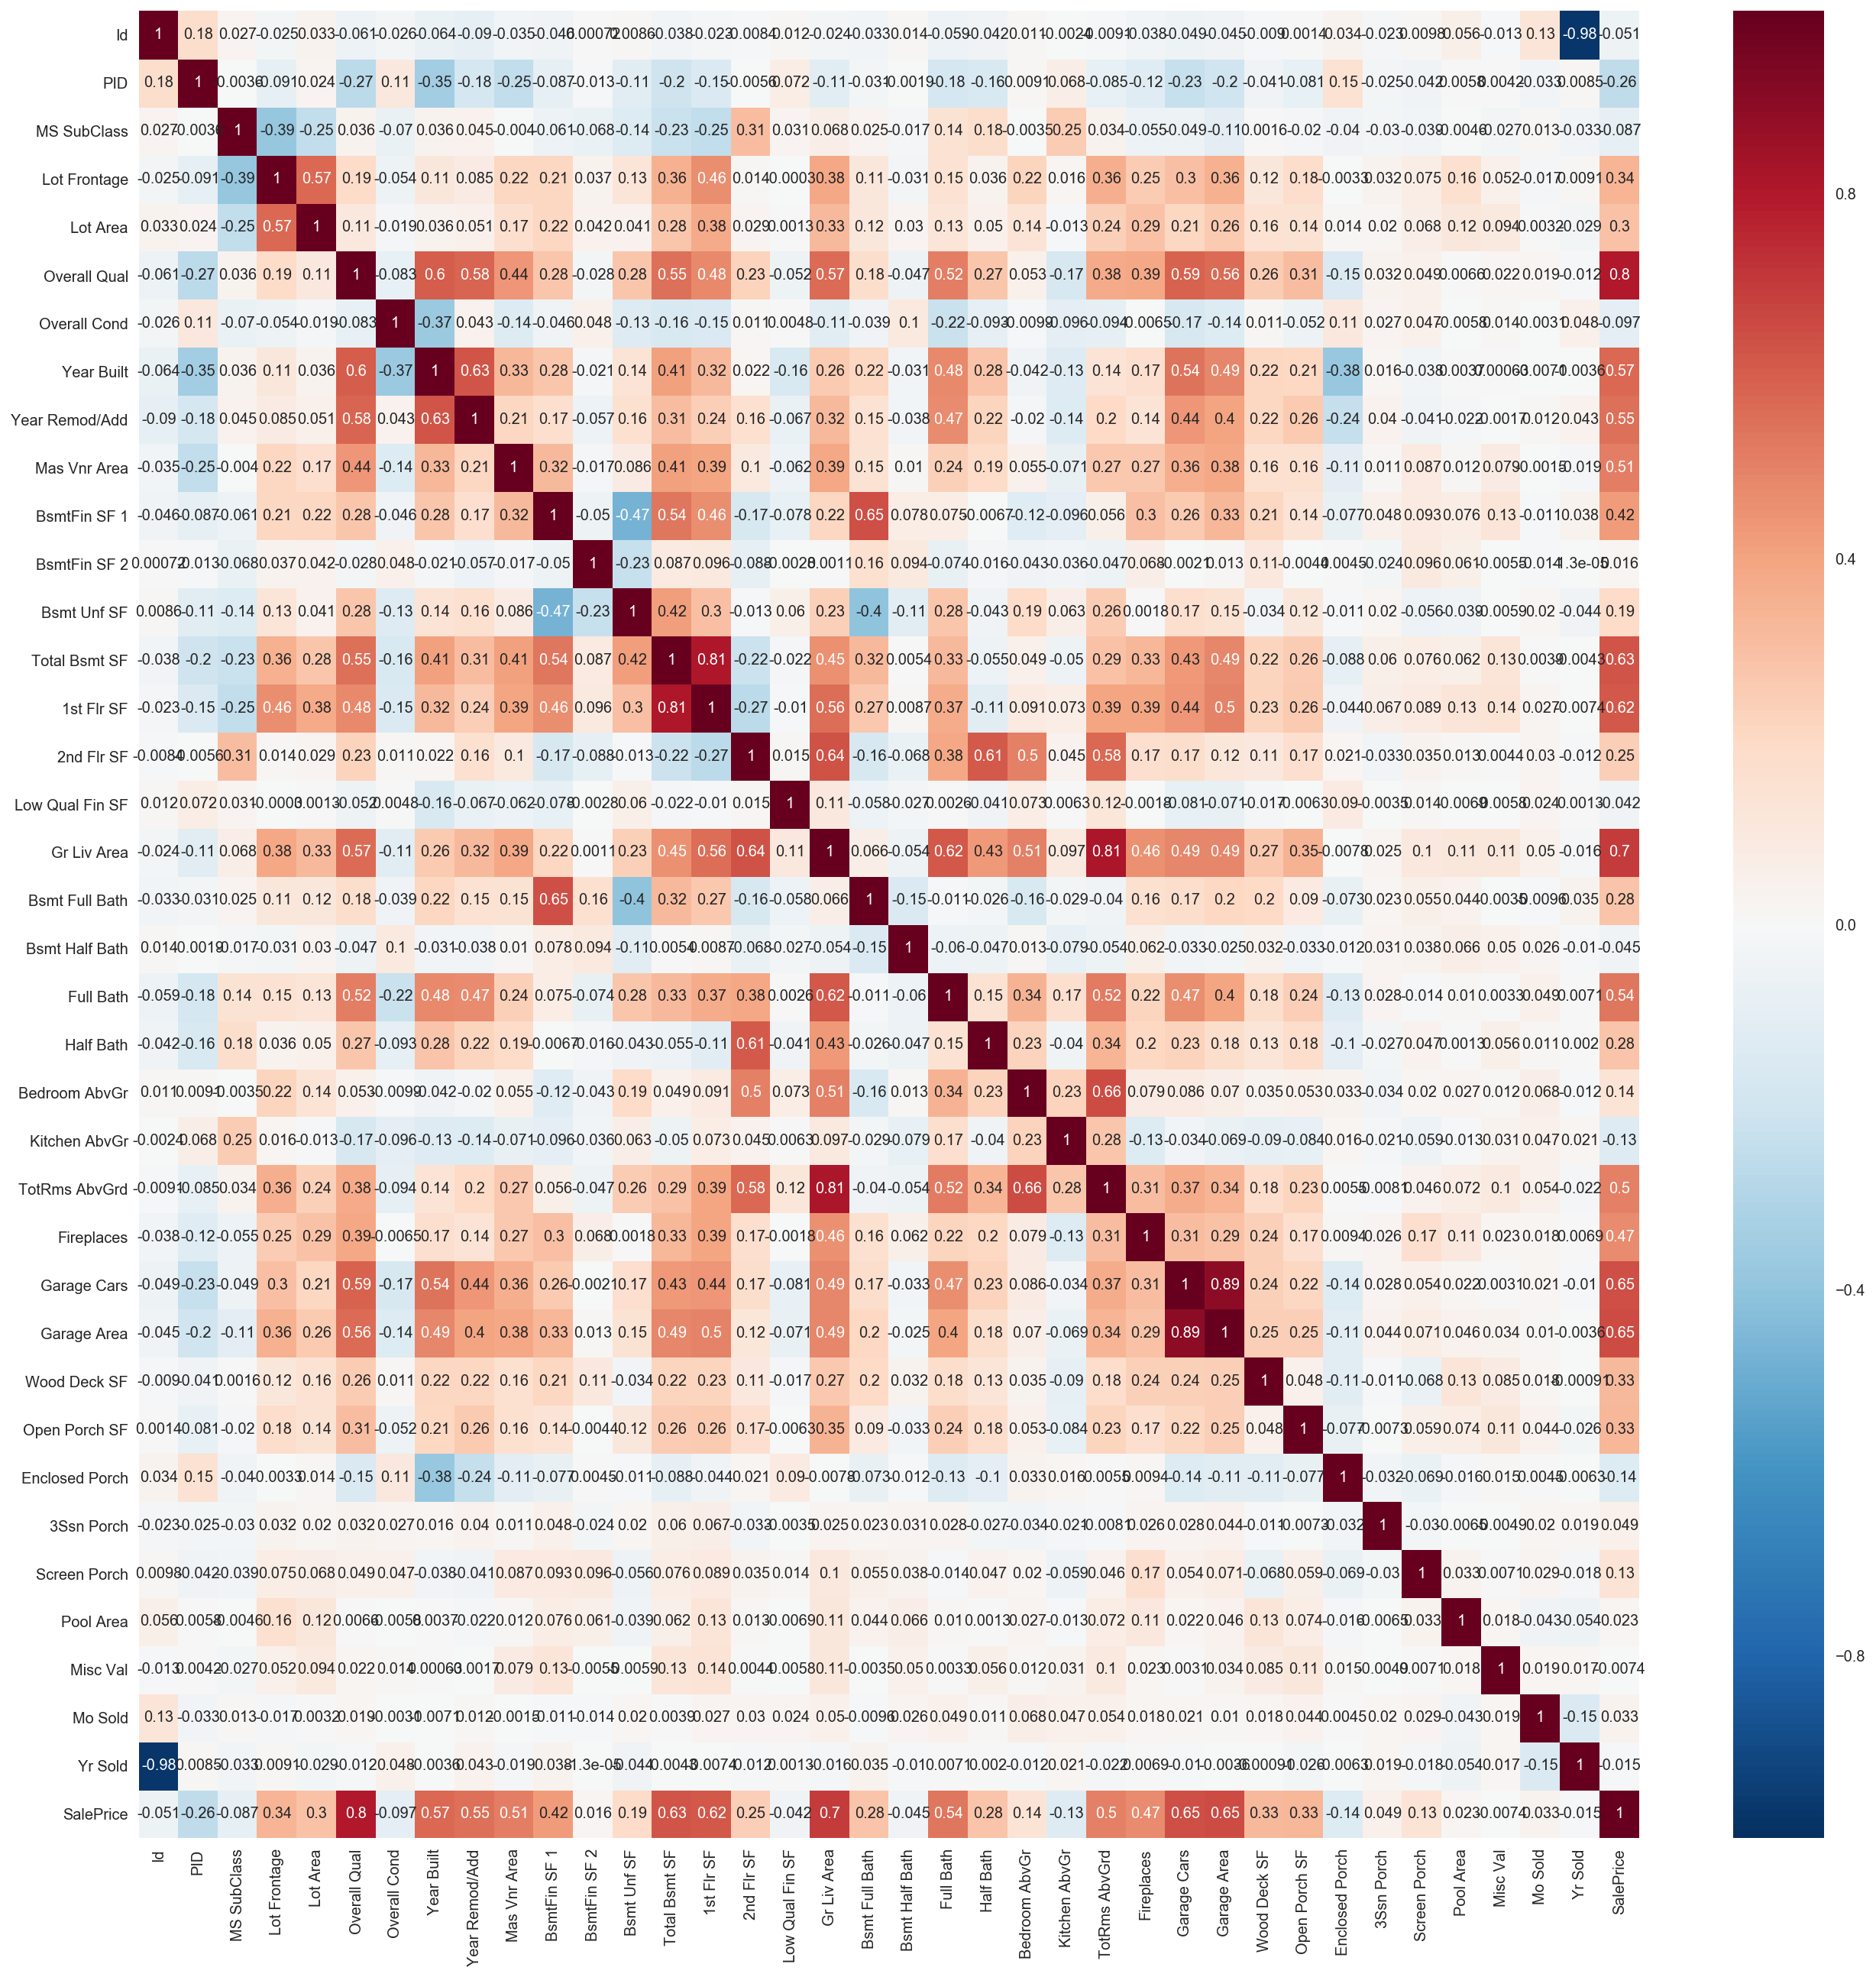

In [12]:
fig, ax = plt.subplots(figsize=(22,22))
sns.heatmap(df.corr(), annot=True);

In [9]:
y = df['SalePrice']

In [11]:
ft_set1 = ['BsmtFin SF 1', 'BsmtFin SF 2']#, 'Bsmt Unf SF', 'Total Bsmt SF']
Xfs1 = df[ft_set1]

In [12]:
poly = PolynomialFeatures(interaction_only=True, include_bias=False)

In [13]:
X_poly = poly.fit_transform(Xfs1)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [13]:
# Change max printed rows
pd.set_option('display.max_rows', 500)
df2.corr()

,Id,PID,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Yr Sold_2010,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
Id,1.000000,0.175793,-0.024967,0.032872,-0.061483,-0.026096,-0.035493,-0.045878,0.000723,0.008555,...,-0.554956,-0.031637,0.039335,-0.029654,-0.036906,-4.783792e-02,-0.001432,0.103437,-0.029746,-0.047898
PID,0.175793,1.000000,-0.091291,0.024135,-0.265863,0.106861,-0.247959,-0.086522,-0.013144,-0.111281,...,0.011811,-0.008264,0.002682,0.001172,0.031038,-2.390343e-02,0.050346,-0.141800,0.023069,0.101437
Lot Frontage,-0.024967,-0.091291,1.000000,0.574024,0.194808,-0.054455,0.218218,0.214178,0.036740,0.127605,...,-0.003897,-0.022710,0.001307,-0.027617,0.030233,1.554509e-02,-0.027519,0.124117,-0.021064,-0.092019
Lot Area,0.032872,0.024135,0.574024,1.000000,0.105824,-0.019185,0.169379,0.215430,0.041717,0.041184,...,-0.004260,-0.011004,0.008240,0.010468,-0.010893,-1.475180e-03,-0.007364,0.042502,-0.011456,-0.025417
Overall Qual,-0.061483,-0.265863,0.194808,0.105824,1.000000,-0.082770,0.438685,0.278742,-0.028199,0.275773,...,-0.035751,-0.095247,0.019040,0.019774,-0.078847,1.884941e-02,-0.031623,0.335389,-0.049978,-0.194904
Overall Cond,-0.026096,0.106861,-0.054455,-0.019185,-0.082770,1.000000,-0.135878,-0.045768,0.047810,-0.130521,...,0.014518,-0.059921,0.027754,-0.012497,-0.061153,4.909506e-04,0.001694,-0.141502,-0.022505,0.157739
Mas Vnr Area,-0.035493,-0.247959,0.218218,0.169379,0.438685,-0.135878,1.000000,0.321807,-0.016756,0.085853,...,-0.035042,-0.022317,-0.023575,-0.019233,-0.002777,1.644032e-02,-0.028328,0.168217,-0.025331,-0.106944
BsmtFin SF 1,-0.045878,-0.086522,0.214178,0.215430,0.278742,-0.045768,0.321807,1.000000,-0.050249,-0.473488,...,0.001736,-0.048155,-0.000942,0.037154,-0.024499,1.851447e-02,-0.023818,0.041367,0.005149,-0.006919
BsmtFin SF 2,0.000723,-0.013144,0.036740,0.041717,-0.028199,0.047810,-0.016756,-0.050249,1.000000,-0.231330,...,0.003967,0.058384,0.034523,0.016093,-0.017485,-1.701785e-02,0.029028,-0.084590,-0.012855,0.033071
Bsmt Unf SF,0.008555,-0.111281,0.127605,0.041184,0.275773,-0.130521,0.085853,-0.473488,-0.231330,1.000000,...,-0.011812,0.021495,-0.015979,-0.029195,-0.021379,1.180317e-02,-0.026758,0.242107,-0.013640,-0.186999


In [ ]:
fig, ax = plt.subplots(figsize=(300,300))
sns.pairplot(df2);

KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x1065d0f28> (for post_execute):


ValueError: Image size of 90000x90000 pixels is too large. It must be less than 2^16 in each direction.